In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

In [159]:
tf.random.set_seed(42)

In [160]:
df = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='DATE'>

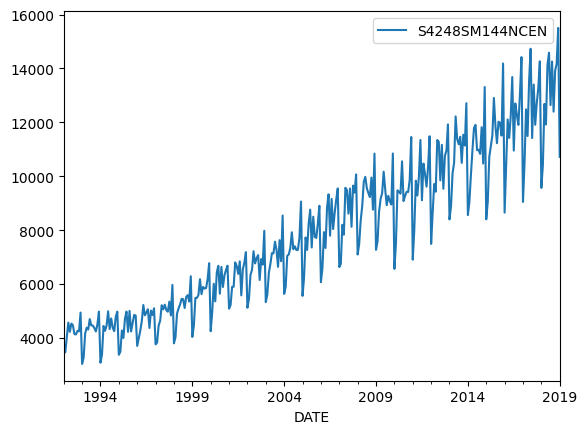

In [161]:
df.plot()

In [162]:
df.rename(columns={'S4248SM144NCEN': 'Sales'}, inplace=True)
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [163]:
results = seasonal_decompose(df['Sales'])

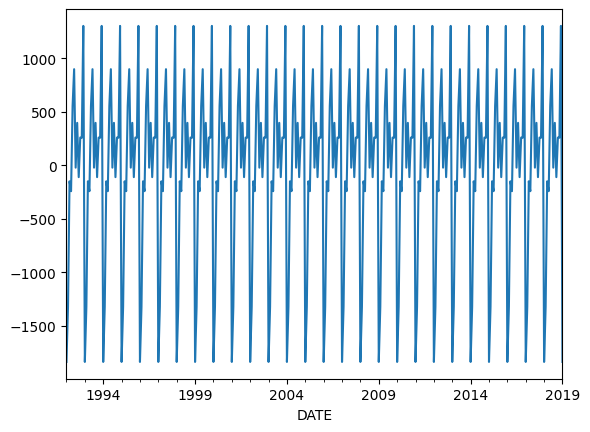

In [164]:
results.seasonal.plot();

In [165]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [166]:
scaler = MinMaxScaler()

In [167]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

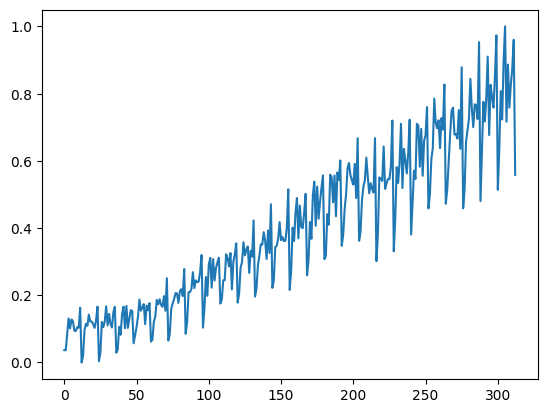

In [168]:
plt.plot(scaled_train)

In [169]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=n_features)

In [170]:
X, y = generator[0]

In [171]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


In [172]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [173]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.fit(generator, epochs=300)

Epoch 1/300
 28/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0799

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0263
Epoch 2/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095
Epoch 3/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109
Epoch 4/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073
Epoch 5/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068
Epoch 6/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076
Epoch 7/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042
Epoch 8/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042
Epoch 9/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 10/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0031
Epoch 11/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024
Epoch 12/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023
Epoch 13/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0018
Epoch 14/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018
Epoch 15/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

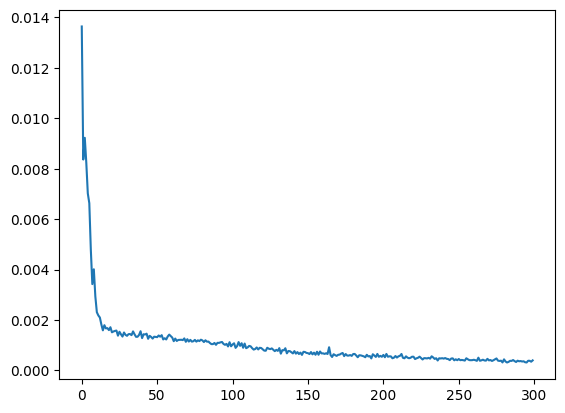

In [175]:
loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

In [176]:
prediction = model.predict(scaled_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [177]:
prediction = scaler.inverse_transform(prediction)

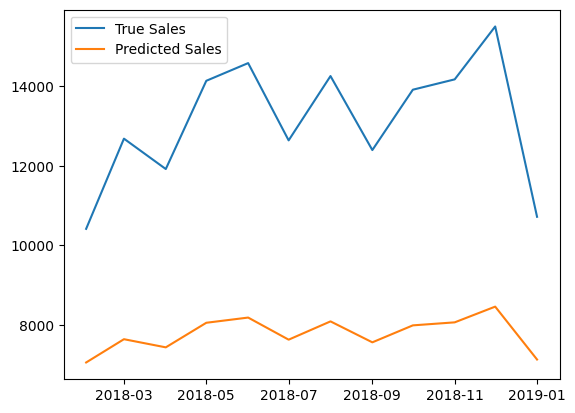

In [178]:
plt.plot(test.index, test['Sales'], label='True Sales')
plt.plot(test.index, prediction, label='Predicted Sales')
plt.legend()